# CIS 419/519 Homework 1

Name: VENKATA JAHNAVI CHOWDARY EDALA

Pennkey: jhanvi

PennID: 20625292

In [0]:
import random 
import numpy as np
import pandas as pd
random.seed(42)  # don't change this line
from sklearn import tree, metrics
from sklearn.model_selection import cross_val_score, train_test_split ,StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import graphviz 
import os



pd.set_option('display.max_columns', 3000)

In [0]:
# Load all data tables
baseDir = '/content/hw1-' 
df = pd.read_csv(baseDir+'NHANES-diabetes-train.csv')

# Output debugging info
print(df.shape)
df.head()


(3884, 1812)


SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  76195         8         2         1        18       NaN         5   
1  76958         8         2         2        57       NaN         2   
2  80248         8         2         2        29       NaN         2   
3  80213         8         2         2         0       5.0         1   
4  76753         8         2         1        61       NaN         3   

   RIDRETH3  RIDEXMON  RIDEXAGM  DMQMILIZ  DMQADFC  DMDBORN4  DMDCITZN  \
0         7       1.0     217.0       2.0      NaN         1       1.0   
1         2       1.0       NaN       2.0      NaN         1       1.0   
2         2       2.0       NaN       2.0      NaN         1       1.0   
3         1       2.0       6.0       NaN      NaN         1       1.0   
4         3       2.0       NaN       2.0      NaN         1       1.0   

   DMDYRSUS  DMDEDUC3  DMDEDUC2  DMDMARTL  RIDEXPRG  SIALANG  SIAPROXY  \
0       NaN      10.0       NaN       NaN       NaN        1       2.0   
1       NaN       NaN       3.0       1.0       NaN        1       2.0   
2       NaN       NaN       4.0       1.0       2.0        1       2.0   
3       NaN       NaN       NaN       NaN       NaN        1       1.0   
4       NaN       NaN       3.0       6.0       NaN        1       2.0   

   SIAINTRP  FIALANG  FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  \
0         2      1.0       2.0       2.0      1.0       2.0       2.0   
1         2      1.0       2.0       2.0      1.0       2.0       2.0   
2         2      1.0       2.0       2.0      1.0       2.0       2.0   
3         2      1.0       2.0       2.0      NaN       NaN       NaN   
4         2      1.0       2.0       2.0      1.0       2.0       2.0   

   AIALANGA  DMDHHSIZ  DMDFMSIZ  DMDHHSZA  DMDHHSZB  DMDHHSZE  DMDHRGND  \
0       1.0         5         5         0         0         0         1   
1       1.0         6         6         1         0         1         1   
2       1.0         3         3         1         0         0         2   
3       NaN         5         5         1         0         0         1   
4       1.0         6         6         0         0         2         2   

   DMDHRAGE  DMDHRBR4  DMDHREDU  DMDHRMAR  DMDHSEDU      WTINT2YR  \
0        55       1.0       2.0       1.0       3.0  14376.087470   
1        27       1.0       4.0       6.0       NaN  19525.577529   
2        29       1.0       4.0       1.0       5.0  29996.753350   
3        33       1.0       4.0       1.0       5.0   6631.892457   
4        52       1.0       4.0       6.0       NaN  18397.696565   

       WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  URXUMA  \
0  14276.370446        2       116       7.0       7.0      1.52   235.0   
1  20416.919012        1       108      14.0      14.0      3.09     1.2   
2  33448.963277        1       104      15.0      15.0      5.00     1.9   
3   6784.984267        1       107      15.0      15.0      5.00     NaN   
4  18470.244689        2       105      10.0      10.0      2.13    37.0   

   URXUMS  URXUCR.x   URXCRS  URDACT    WTSAF2YR.x  LBXAPB  LBDAPBSI  LBXSAL  \
0   235.0     170.0  15028.0  138.24           NaN     NaN       NaN     5.1   
1     1.2      42.0   3712.8    2.86  39067.684214   119.0      1.19     4.0   
2     1.9      47.0   4154.8    4.04           NaN     NaN       NaN     4.4   
3     NaN       NaN      NaN     NaN           NaN     NaN       NaN     NaN   
4    37.0     153.0  13525.2   24.18  36293.151363    53.0      0.53     3.8   

   LBDSALSI  LBXSAPSI  LBXSASSI  LBXSATSI  LBXSBU  LBDSBUSI  LBXSC3SI  LBXSCA  \
0      51.0      87.0      30.0      15.0     8.0      2.86      22.0    10.6   
1      40.0      69.0      18.0      15.0    16.0      5.71      23.0     9.4   
2      44.0      71.0      25.0      19.0    13.0      4.64      25.0     9.9   
3       NaN       NaN       NaN       NaN     NaN       NaN       NaN     NaN   
4      38.0      62.0      28.0  

In [0]:
# Print information about the dataset
print('Percentage of instances with missing features:')
print(df.isnull().sum(axis=0)/df.shape[0])
print()
print('Class information:')
print(df['DIABETIC'].value_counts())

Percentage of instances with missing features:
SEQN        0.000000
SDDSRVYR    0.000000
RIDSTATR    0.000000
RIAGENDR    0.000000
RIDAGEYR    0.000000
              ...   
WHQ150      0.402420
WHQ030M     0.853244
WHQ500      0.853244
WHQ520      0.853244
DIABETIC    0.000257
Length: 1812, dtype: float64

Class information:
0.0    3548
1.0     335
Name: DIABETIC, dtype: int64


## **Preprocessing**

The first key step in any data modeling task is cleaning your dataset. Explore your dataset and figure out what sort of preprocessing is required. Good preprocessing can make or break your final model. So choose wisely.

Some of the preprocessing steps that you can consider are :


*   One-hot encoding of variables
*   Missing value imputation
*   Removing outliers
*   Converting binary features into 0-1 representation


Feel free to reuse code you've already written in HW 0.






In [0]:
# TODO Insert your preprocessing code here

#Drop columns with many null values
df.dropna(axis=1,thresh=df.shape[0]/2, inplace = True)

#replace with median
df.fillna(df.mode().iloc[0],inplace = True)





# Split into X,y matrices
X = df.drop(['DIABETIC' , 'SEQN'], axis=1)
y = df['DIABETIC']

#One hot coding

X_obj = X.select_dtypes(include='object')
X_obj.head()
for head in X_obj.columns:
  X_onehots = pd.get_dummies(X[head], prefix= head )
  X.drop(head, axis = 1, inplace = True)
  X = pd.concat([X, X_onehots], axis=1)
  
X.head()

#df = df.fillna(df.mode().iloc[0], inplace = True)
#df.head()




,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC2,DMDMARTL,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,PHQ020,PHQ030,PHQ040,PHQ050,PHQ060,PHAFSTHR.x,PHAFSTMN.x,PHDSESN,LBDHDD,LBDHDDSI,LBXHA,LBXHBS,LBXHBC,LBDHBG,LBDHD,LBDHEG,LBDHEM,ORXGH,ORXGL,ORXH06,ORXH11,ORXH16,ORXH18,ORXH26,ORXH31,ORXH33,ORXH35,ORXH39,ORXH40,ORXH42,ORXH45,ORXH51,ORXH52,ORXH53,ORXH54,ORXH55,ORXH56,ORXH58,ORXH59,ORXH61,ORXH62,ORXH64,ORXH66,ORXH67,ORXH68,ORXH69,ORXH70,ORXH71,ORXH72,ORXH73,ORXH81,ORXH82,ORXH83,ORXH84,ORXHPC,ORXHPI,ORXHPV,WTSH2YR.x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,LBXTC,LBDTCSI,LBXTTG,WTSH2YR.y,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXSAD1,BMXSAD2,BMDAVSAD,MGDEXSTS,MGD050,MGQ070,MGQ100,MGD130,MGQ90DG,MGDSEAT,MGAPHAND,MGATHAND,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX14TC,OHX15TC,OHX16TC,OHX17TC,OHX18TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD360,ACD011A,ALQ101,BPQ020,BPQ056,BPQ059,BPQ080,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,HSAQUEX,DIQ010,DIQ160,DIQ170,DIQ172,DIQ180,DIQ050,DBQ700,DBQ197,DBQ229,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ505,CBQ535,CBQ545,CBQ550,CBQ552,CBQ580,CBQ590,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,FSD032A,FSD032B,FSD032C,FSD032D,FSD032E,FSD032F,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSQ162,HEQ010,HEQ030,HIQ011,HIQ270,HIQ210,HOD050,HOQ065,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ071,HUQ090,IMQ011,IMQ020,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ244,MCQ010,MCQ053,MCQ070,MCQ080,MCQ082,MCQ086,MCQ092,MCQ160A,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160M,MCQ160K,MCQ160L,MCQ160O,MCQ203,MCQ220,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,OCD150,OCD390G,OHQ030,OHQ033,OHQ770,OHQ845,PFQ049,PFQ051,PFQ054,PFQ057,PFQ090,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,PAD680,PAQ710,PAQ

In [0]:


from sklearn.model_selection import train_test_split

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## **Modeling**

In this section, you are tasked with building a Decision Tree classifier to predict whether or not a patient has diabetes. The overall goal of this exercise is to investigate the dataset and develop features that would improve your model performance.

To help with this process, we have provided the structure for two helper functions. These functions will help in tuning your model as well as validating your model's performance.

Complete these two functions.



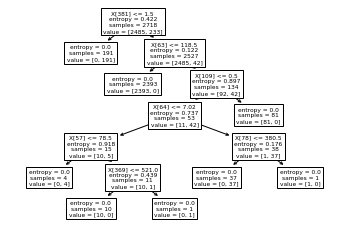

In [0]:
#first model
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

print()


In [0]:
def cross_validated_accuracy(DecisionTreeClassifier, X, y, num_trials, num_folds, random_seed):
  random.seed(random_seed)
  """
   Args:
        DecisionTreeClassifier: An Sklearn DecisionTreeClassifier (e.g., created by "tree.DecisionTreeClassifier(criterion='entropy')")
        X: Input features
        y: Labels
        num_trials: Number of trials to run of cross validation
        num_folds: Number of folds (the "k" in "k-folds")
        random_seed: Seed for uniform execution (Do not change this) 

    Returns:
        cvScore: The mean accuracy of the cross-validation experiment

    Notes:
        1. You may NOT use the cross-validation functions provided by Sklearn
  """
  scores = []
  df_tem = pd.concat([X, y], axis = 1)
   
  for i in range(num_trials):
    df_trial = df_tem.sample(frac = 1, random_state = random.randint(1, 1000))
    length = len(df_trial.iloc[0])
    chunk = length // num_folds
    for j in range(0,length, chunk ):
      if j + chunk < length:
        df_trial_test = df_trial.iloc[j : j + chunk]
        df_trail_train = df_trial.drop(df_trial.index[j : j + chunk])
        X_t_train = df_trail_train.drop(['DIABETIC'], axis=1)
        Y_t_train = df_trail_train['DIABETIC']
        X_t_test = df_trial_test.drop(['DIABETIC'], axis=1)
        Y_t_test =  df_trial_test['DIABETIC']   

        clf_temp = DecisionTreeClassifier
        clf_temp = clf_temp.fit(X_t_train, Y_t_train)   
        y_pred = clf_temp.predict(X_t_test)
        test_err = ((Y_t_test != y_pred).sum()) / X_t_test.shape[0]
        scores.append(test_err)
        
  cvScore = 1 -(sum(scores) / len(scores)) 


  ## TODO ## 
  return cvScore

In [0]:
#unpruned data
y_pred = clf.predict(X_train)
print("Train error (unPruned): " + str(((y_train != y_pred).sum()) / X_train.shape[0]) + "   N = " + str(X_train.shape[0]))

#cvs_unprun = cross_validated_accuracy(clf, X_test, y_test, 10, 10, 4)
#print("CV estimate of test error (unPruned):" + str(cvs_unprun)

#y_pred = clf.predict(X_test)
#print("Actual test error (unPruned): " + str(((y_test != y_pred).sum()) / X_test.shape[0]) + "   N = " + str(X_test.shape[0]))



Train error (unPruned): 0.012141280353200883   N = 2718


SyntaxError: ignored

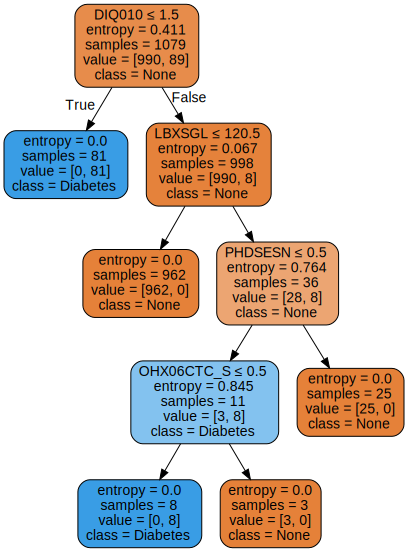

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Unpruned Tree") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['None', 'Diabetes'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph   


In [0]:
def automatic_dt_pruning(DecisionTreeClassifier, X, y, num_trials, num_folds, random_seed):
  random.seed(random_seed)
  """
  Returns the pruning parameter (i.e., ccp_alpha) with the highest cross-validated accuracy

  Args:
        DecisionTreeClassifier  : An Sklearn DecisionTreeClassifier (e.g., created by "tree.DecisionTreeClassifier(criterion='entropy')")      
        X (Pandas.DataFrame)    : Input Features
        y (Pandas.Series)       : Labels
        num_trials              : Number of trials to run of cross validation
        num_folds               : Number of folds for cross validation (The "k" in "k-folds") 
        random_seed             : Seed for uniform execution (Do not change this)


    Returns:
        ccp_alpha : Tuned pruning paramter with highest cross-validated accuracy

    Notes:
        1. Don't change any other Decision Tree Classifier parameters other than ccp_alpha
        2. Use the cross_validated_accuracy function you implemented to find the cross-validated accuracy

  """
  cvs_min = 0
  ccp_max = 0
  for c in range(1, 20):
    
    
    DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha = c / 1000)
    cvs_temp = cross_validated_accuracy(DecisionTreeClassifier, X, y, num_trials, num_folds, random_seed)
    print("+++++++"+str(cvs_temp))

    if cvs_temp > cvs_min:
      ccp_max = c / 1000
      cvs_min = cvs_temp
      print(ccp_max)
      print(cvs_temp)
      
  ccp_alpha = ccp_max

 
  return ccp_alpha

## **Tuning and Testing**

With the helper functions and your processed dataset, build a Decision Tree classifier to classify Diabetic patients and tune it to maximize model performance.

Once you are done with your modeling process, test your model on the test dataset and output your predictions in a file titled "cis519_hw1_predictions.csv", with one row per prediction.

In [0]:
#Pruning tree

ccp_optimal = automatic_dt_pruning(tree.DecisionTreeClassifier(criterion='entropy'), X_test, y_test, 10, 10, 4)



+++++++0.9933333333333333
0.001
0.9933333333333333
+++++++0.9933333333333333
+++++++0.9937931034482759
0.003
0.9937931034482759
+++++++0.993448275862069
+++++++0.993103448275862
+++++++0.9942528735632183
0.006
0.9942528735632183
+++++++0.9945977011494253
0.007
0.9945977011494253
+++++++0.9950574712643678
0.008
0.9950574712643678
+++++++0.9959770114942529
0.009
0.9959770114942529
+++++++0.9959770114942529
+++++++0.995632183908046
+++++++0.9952873563218391
+++++++0.9952873563218391
+++++++0.9947126436781609
+++++++0.9947126436781609
+++++++0.9937931034482759
+++++++0.9928735632183908
+++++++0.9910344827586207
+++++++0.9910344827586207


In [0]:
ccp_optimal

0.009

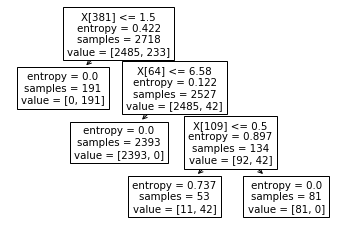

In [0]:
clf_pruned = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_optimal)
clf_pruned = clf_pruned.fit(X_train, y_train)

tree.plot_tree(clf_pruned)

print()

In [0]:
#Testing pruned data
y_pred = clf_pruned.predict(X_train)
print("Train error (Pruned): " + str(((y_train != y_pred).sum()) / X_train.shape[0]) + "   N = " + str(X_train.shape[0]))

cvs_prun = cross_validated_accuracy(clf_pruned, X_test, y_test, 10, 10, 4)
print("CV estimate of test error (Pruned):" + str(cvs_prun))

y_p = clf_pruned.predict(X_test)
print("Actual test error (Pruned): " + str(((y_test != y_p).sum()) / X_test.shape[0]) + "   N = " + str(X_test.shape[0]))


Train error (Pruned): 0.004047093451066961   N = 2718
CV estimate of test error (Pruned):0.9959770114942529
Actual test error (Pruned): 0.002572898799313894   N = 1166


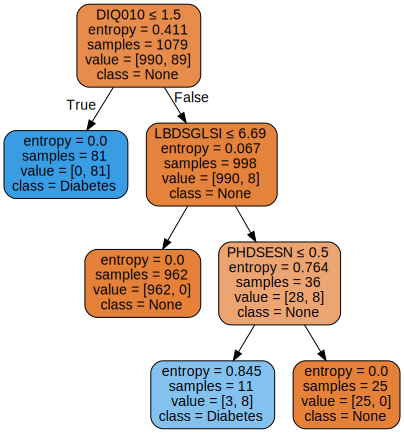

In [0]:
# visualize the decision tree (Pruned)
import graphviz 
dot_data = tree.export_graphviz(clf_pruned, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Pruned Tree") 
dot_data = tree.export_graphviz(clf_pruned, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['None', 'Diabetes'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph   

In [0]:
#Cleaning test data


baseDir = '/content/hw1-' 
df_tst = pd.read_csv(baseDir+'NHANES-diabetes-test-unlabeled.csv')

#removing null values
df_tst.fillna(df_tst.mode().iloc[0],inplace = True)

#selecting charcter cloumns
X_obj = df_tst.select_dtypes(include='object')
X_obj.head()

#one hot encoding
for head in X_obj.columns:
  df_onehots = pd.get_dummies(df_tst[head], prefix= head )
  df_tst.drop(head, axis = 1, inplace = True)
  df_tst = pd.concat([df_tst, df_onehots], axis=1)


df_tst.head(10)

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  77252         8         2         2        12       1.0         4   
1  79020         8         2         1         0       7.0         3   
2  76059         8         2         1        21       1.0         4   
3  78115         8         2         1        11       1.0         3   
4  75761         8         2         2         6       1.0         4   
5  83514         8         2         2        53       1.0         1   
6  81188         8         2         2        14       1.0         1   
7  76227         8         2         2        26       1.0         3   
8  82647         8         2         2        10       1.0         4   
9  80395         8         2         1         9       1.0         1   

   RIDRETH3  RIDEXMON  RIDEXAGM  DMQMILIZ  DMQADFC  DMDBORN4  DMDCITZN  \
0         4       2.0     153.0       2.0      1.0         1       1.0   
1         3       1.0       8.0       2.0      1.0         1       1.0   
2         4       1.0       2.0       2.0      1.0         1       1.0   
3         3       2.0     143.0       2.0      1.0         1       1.0   
4         4       2.0      75.0       2.0      1.0         1       1.0   
5         1       1.0       2.0       2.0      1.0         2       1.0   
6         1       2.0     171.0       2.0      1.0         1       1.0   
7         3       1.0       2.0       2.0      1.0         1       1.0   
8         4       1.0     126.0       2.0      1.0         1       1.0   
9         1       1.0     110.0       2.0      1.0         1       1.0   

   DMDYRSUS  DMDEDUC3  DMDEDUC2  DMDMARTL  RIDEXPRG  SIALANG  SIAPROXY  \
0       6.0       6.0       4.0       1.0       2.0        1       1.0   
1       6.0       0.0       4.0       1.0       2.0        1       1.0   
2       6.0       0.0       3.0       6.0       2.0        1       2.0   
3       6.0       5.0       4.0       1.0       2.0        1       1.0   
4       6.0       0.0       4.0       1.0       2.0        1       1.0   
5       7.0       0.0       3.0       1.0       2.0        2       2.0   
6       6.0       8.0       4.0       1.0       2.0        1       1.0   
7       6.0       0.0       4.0       1.0       2.0        1       2.0   
8       6.0       5.0       4.0       1.0       2.0        1       1.0   
9       6.0       2.0       4.0       1.0       2.0        1       1.0   

   SIAINTRP  FIALANG  FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  \
0         2      1.0       2.0       2.0      1.0       2.0       2.0   
1         2      1.0       2.0       2.0      1.0       2.0       2.0   
2         2      1.0       2.0       2.0      1.0       2.0       2.0   
3         2      1.0       2.0       2.0      1.0       2.0       2.0   
4         2      1.0       2.0       2.0      1.0       2.0       2.0   
5         2      1.0       2.0       2.0      2.0       2.0       2.0   
6         2      1.0       2.0       2.0      1.0       2.0       2.0   
7         2      1.0       2.0       2.0      1.0       2.0       2.0   
8         2      1.0       2.0       2.0      1.0       2.0       2.0   
9         2      1.0       2.0       2.0      1.0       2.0       2.0   

   AIALANGA  DMDHHSIZ  DMDFMSIZ  DMDHHSZA  DMDHHSZB  DMDHHSZE  DMDHRGND  \
0       1.0         3         3         0         2         0         2   
1       1.0         5         4         2         0         0         2   
2       1.0         2         2         0         0         0         1   
3       1.0         5         5         1         2         0         1   
4       1.0         5         5         0         2         0         2   
5       2.0         7         7         2         1         0         2   
6       1.0         7         7         0         3         0         1   
7       1.0         2         2         0         0         0         1   
8       1.0         6         5         1         2         0         2   
9       1.0         6      

In [0]:
#Removing extra columns

req_col = X_train.columns
test_col = df_tst.columns

for index in test_col:
  if index not in req_col:

    df_tst.drop(index, axis=1, inplace=True)
#adding dummy columns
add_col = []
test_col = df_tst.columns
for index in req_col:
  if index not in test_col:
    add_col.append(index)
df_tst = pd.concat([df_tst,pd.get_dummies(add_col)], axis=1)

#deleting infinity values
df_tst[df_tst==np.inf]=np.nan
df_tst.fillna(df_tst.mean(), inplace=True)



In [0]:
#final prediction
y_pred_final = clf_pruned.predict(df_tst)
print(y_pred_final)

[0. 0. 0. ... 1. 1. 0.]


In [0]:
import csv

csvfile = "/content/final_prediction.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in y_pred_final:
        writer.writerow([val])

IsADirectoryError: ignored